In [50]:
#ALL THE PACKAGES USED AND LOADING OF DATASET-
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/drive/MyDrive/Copy of WHR-2024-5CS037.csv')

In [51]:
#3.1 (PROBLEM-1)
#Data Exploration and Understanding-

#DATA OVERVIEW-
print("first ten rows:\n")
data.head(10)

rows, columns = data.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

(data.dtypes)


first ten rows:

Number of rows: 143
Number of columns: 9


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [52]:
#BASIC STATISTICS-
print("THE MEAN,MEDIAN AND MODE\n")
print(f"mean:{data['score'].mean()}")
print(f"mean:{data['score'].median()}")
print(f"mean:{data['score'].std()}")


THE MEAN,MEDIAN AND MODE

mean:5.52758041958042
mean:5.785
mean:1.1707165099442995


In [53]:
#FILTERIING AND SORTING-
happiest=data.loc[data['score'].idxmax()]
happiest=data.loc[data['score'].idxmax()]
print(f"{happiest}is happiest country\n")
print(f"{happiest}is low happiest country\n")

Country name                    Finland
score                             7.741
Log GDP per capita                1.844
Social support                    1.572
Healthy life expectancy           0.695
Freedom to make life choices      0.859
Generosity                        0.142
Perceptions of corruption         0.546
Dystopia + residual               2.082
Name: 0, dtype: objectis happiest country

Country name                    Finland
score                             7.741
Log GDP per capita                1.844
Social support                    1.572
Healthy life expectancy           0.695
Freedom to make life choices      0.859
Generosity                        0.142
Perceptions of corruption         0.546
Dystopia + residual               2.082
Name: 0, dtype: objectis low happiest country



In [54]:
#MISSING WALA
missing_values = data.isnull().sum()
(missing_values)


,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


In [55]:
greater=data[data['score']>7.5]
(f"Are the Countries having score more than 7.5:\n{greater}")

sorted_gdp = greater.sort_values(by='Log GDP per capita', ascending=False)
("The sorted GDP data are:")
print(sorted_gdp)

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [56]:
#NEW COLUMN ADDING
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'
data['Happiness Category'] = data['score'].apply(categorize_happiness)
print(data[['Country name', 'score', 'Happiness Category']].head(10))

  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


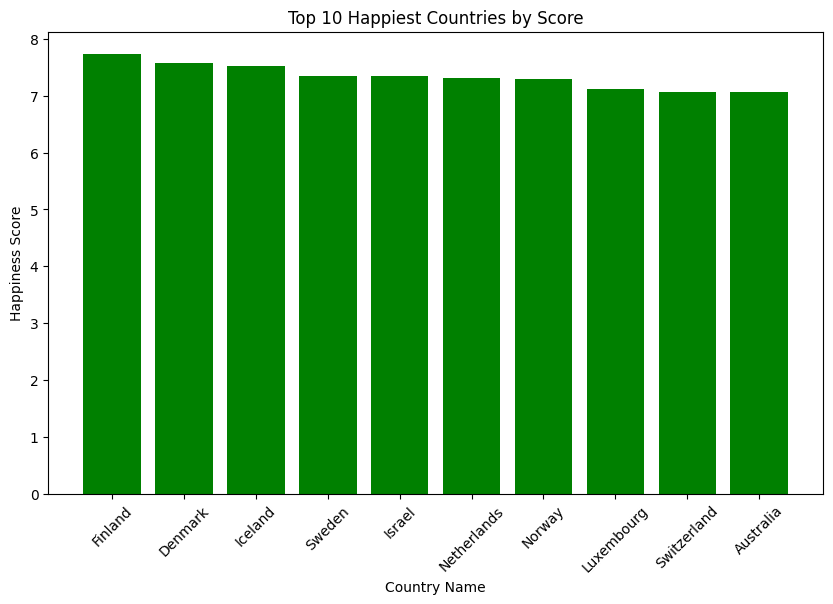

In [57]:
#2 DATA VISUALIZATION-

#BAR PLOT
top_10_happy = data.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
plt.bar(top_10_happy['Country name'], top_10_happy['score'], color='green')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country Name')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

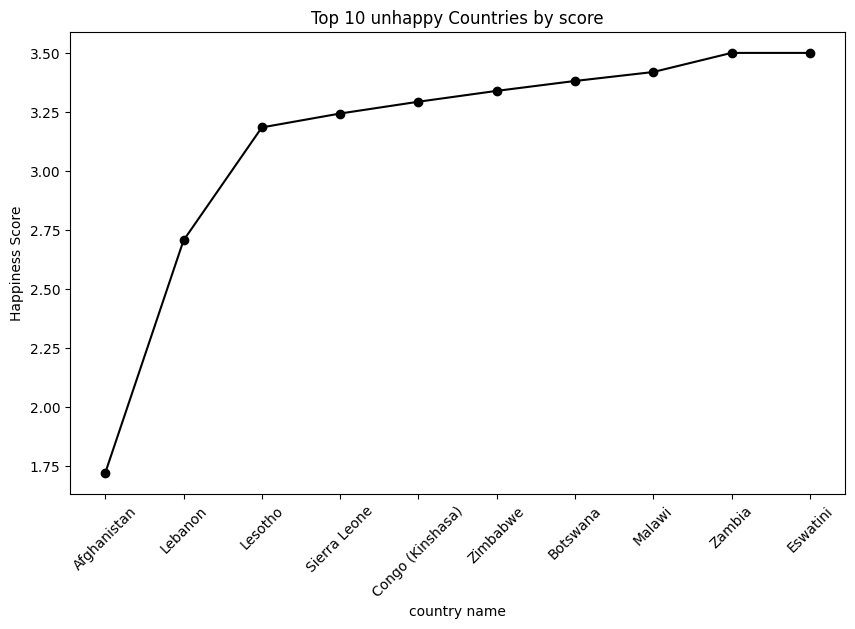

In [58]:
#LINE PLOT-
top_10_lowscore= data.nsmallest(10,'score')
plt.figure(figsize=(10,6))
plt.plot(top_10_lowscore['Country name'],top_10_lowscore['score'], marker='o',linestyle='-',color='black')
plt.title("Top 10 unhappy Countries by score")
plt.xlabel('country name')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

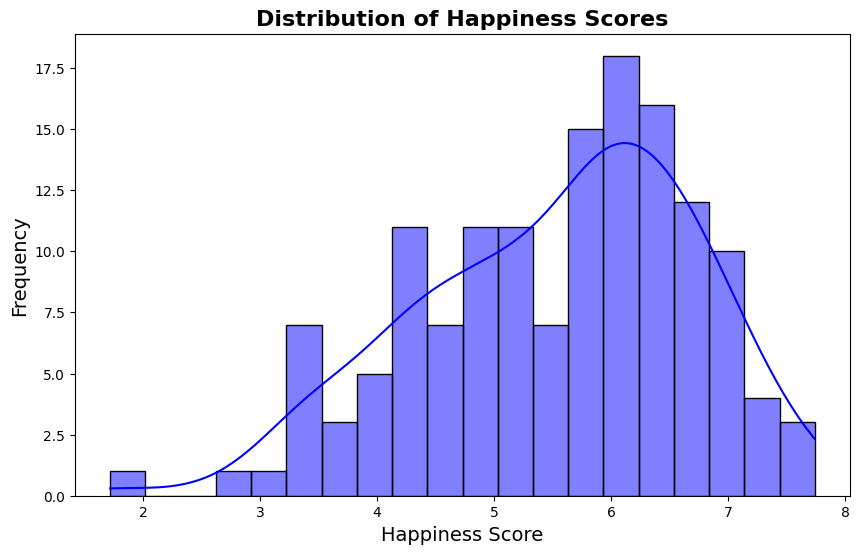

In [59]:
#HISTOGRAM-
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Happiness Scores', fontsize=16, fontweight='bold')
plt.xlabel('Happiness Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

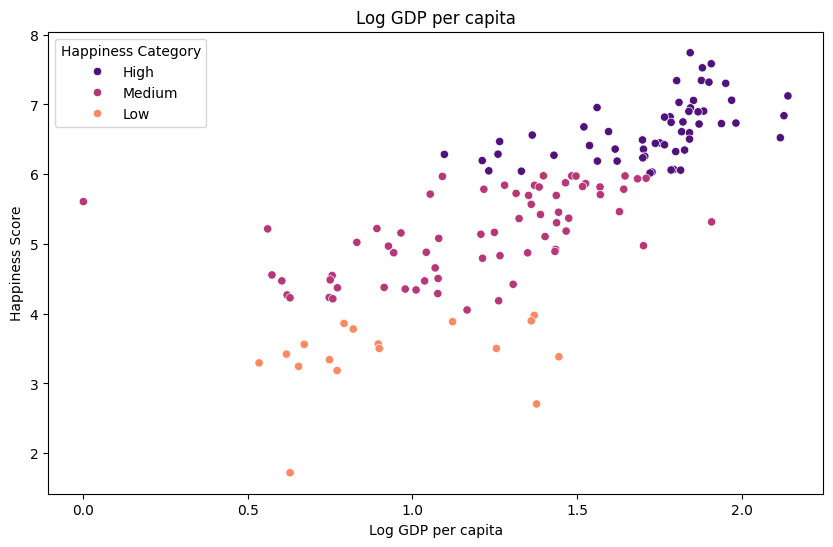

In [60]:
#SCATTER PLOT-
plt.figure(figsize=(10,6))
sns.scatterplot(x="Log GDP per capita", y="score", data=data, hue="Happiness Category", palette="magma")
plt.title("Log GDP per capita")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness Score")
plt.legend(title="Happiness Category")
plt.show()

In [61]:
#3.2 PROBLEM 2-

#TASK-1
# List of South Asian countries
southasia_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Sri Lanka', 'Pakistan', 'Nepal']

# Filter dataset for South Asian countries
southasia = data[data['Country name'].isin(southasia_countries)]

# Save the filtered dataframe as a separate CSV file
southasia.to_csv('southasiandataset.csv', index=False)
print("southasia saved as southasiandataset.csv")



#TASK-2
# Composite ranking calculation
southasia['composite_core'] = (0.40 * southasia['Log GDP per capita'] +
                               0.30 * southasia['Healthy life expectancy'] +
                               0.30 * southasia['Social support'])

# Sorting by the composite ranking in descending order
southasia_sorted = southasia.sort_values(by='composite_core', ascending=False)

# Getting the top 5 countries based on the composite ranking
top5 = southasia_sorted.head(5)

print(top5)


southasia saved as southasiandataset.csv
    Country name  score  Log GDP per capita  Social support  \
127    Sri Lanka  3.898               1.361           1.179   
92         Nepal  5.158               0.965           0.990   
125        India  4.054               1.166           0.653   
107     Pakistan  4.657               1.069           0.600   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
127                    0.586                         0.583       0.144   
92                     0.443                         0.653       0.209   
125                    0.417                         0.767       0.174   
107                    0.321                         0.542       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
127                      0.031                0.014          

<ipython-input-61-0d000825691f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southasia['composite_core'] = (0.40 * southasia['Log GDP per capita'] +


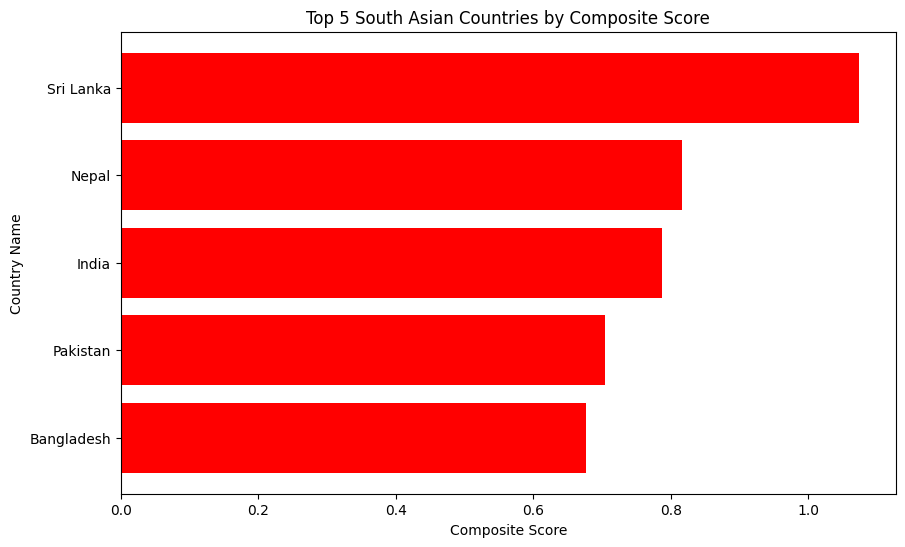

In [62]:
#TASK-2 (BAR PLOTTING)
plt.figure(figsize=(10, 6))
plt.barh(top5['Country name'], top5['composite_core'], color='red')
plt.xlabel('Composite Score')  # x-axis label
plt.ylabel('Country Name')  # y-axis label
plt.title('Top 5 South Asian Countries by Composite Score')  # title
plt.gca().invert_yaxis()  # invert y-axis to have the highest composite score at the top
plt.show()

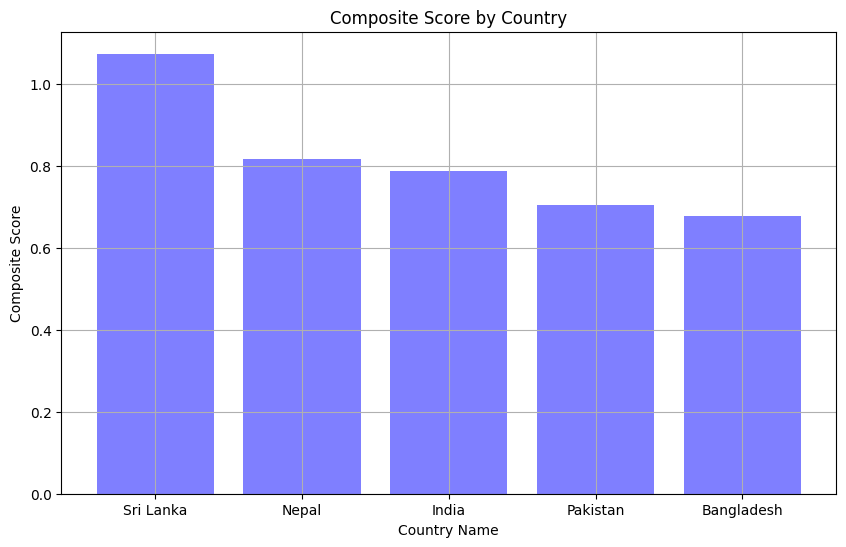

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(top5['Country name'], top5['composite_core'], color='blue', alpha=0.5)
plt.title("Composite Score by Country")
plt.xlabel("Country Name")
plt.ylabel("Composite Score")
plt.grid(True)

plt.show()

Outlier countries based on Score and GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


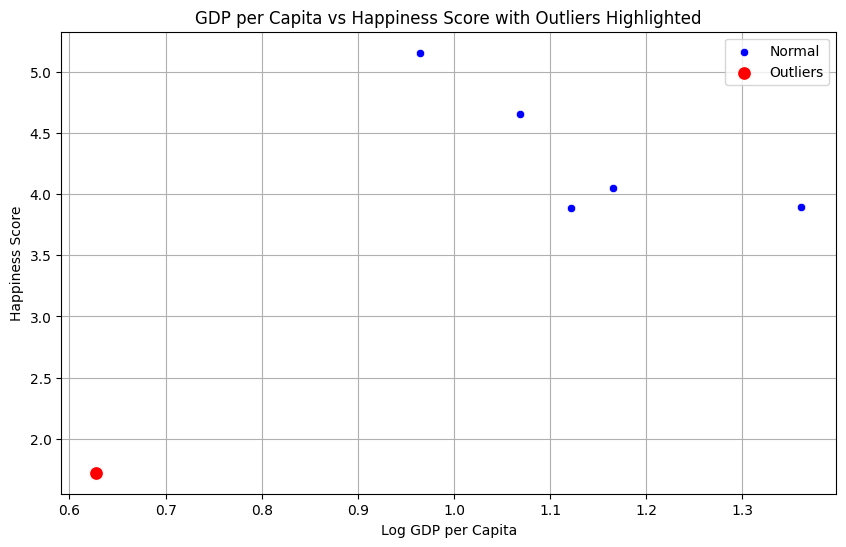


Regional Averages:
Average Happiness Score for South Asia: 3.90
Average GDP per Capita for South Asia: 1.05

Outlier Countries Average:
Average Happiness Score for Outliers: 1.72
Average GDP per Capita for Outliers: 0.63


In [68]:
#TASK 3-
south_asian_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Sri Lanka', 'Pakistan', 'Nepal']

southasia_df = data[data['Country name'].isin(south_asian_countries)]
metrics = ['score', 'Log GDP per capita']

def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

score_outliers = identify_outliers(southasia_df, 'score')
gdp_outliers = identify_outliers(southasia_df, 'Log GDP per capita')

outliers_combined = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

print("Outlier countries based on Score and GDP per Capita:")
print(outliers_combined[['Country name', 'score', 'Log GDP per capita']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=southasia_df, label='Normal', color='blue')

sns.scatterplot(x=outliers_combined['Log GDP per capita'], y=outliers_combined['score'], color='red', label='Outliers', s=100)

plt.title('GDP per Capita vs Happiness Score with Outliers Highlighted')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)

plt.show()

mean_score = southasia_df['score'].mean()
mean_gdp = southasia_df['Log GDP per capita'].mean()

print(f"\nRegional Averages:")
print(f"Average Happiness Score for South Asia: {mean_score:.2f}")
print(f"Average GDP per Capita for South Asia: {mean_gdp:.2f}")

# DiscussING how outliers affect the mean (regional averages)
outlier_scores = outliers_combined['score'].mean()
outlier_gdp = outliers_combined['Log GDP per capita'].mean()

print(f"\nOutlier Countries Average:")
print(f"Average Happiness Score for Outliers: {outlier_scores:.2f}")
print(f"Average GDP per Capita for Outliers: {outlier_gdp:.2f}")



<ipython-input-75-7a60b77a29c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southasia_df['GDP-Score Gap'] = southasia_df['Log GDP per capita'] - southasia_df['score']


Top 3 countries with the largest positive GDP-Score Gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 countries with the largest negative GDP-Score Gap:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


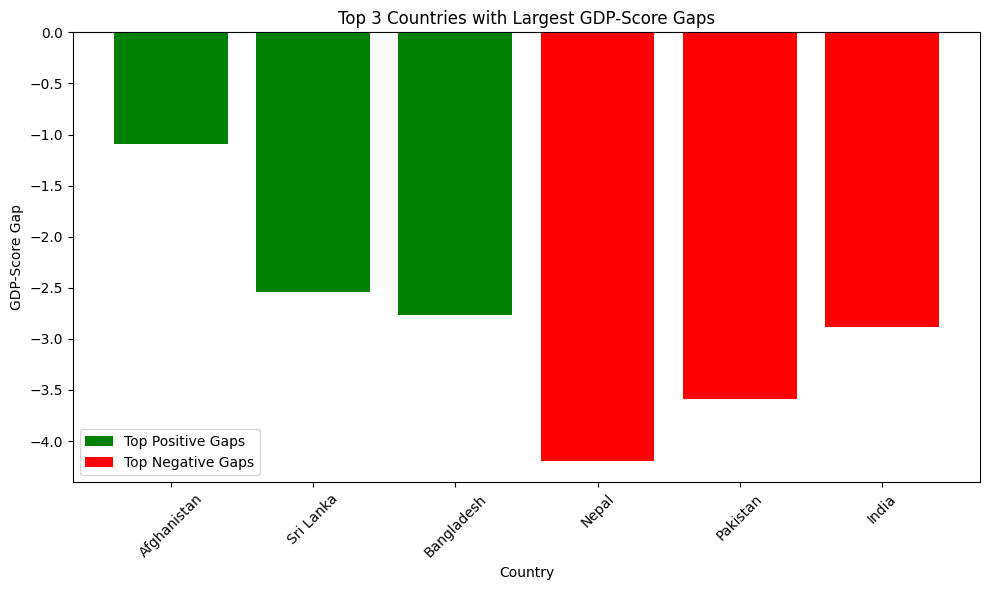


Analysis of GDP-Score Gaps:
Countries with large positive GDP-Score gaps may have high economic growth but poor happiness scores.
Countries with large negative GDP-Score gaps may have lower GDP but higher happiness scores, suggesting other factors like social factors, government policies, or cultural aspects play a more significant role in their happiness.


In [75]:
#TASK 5-
south_asian_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Sri Lanka', 'Pakistan', 'Nepal']

southasia_df = data[data['Country name'].isin(south_asian_countries)]

southasia_df['GDP-Score Gap'] = southasia_df['Log GDP per capita'] - southasia_df['score']

# Ranking the South Asian countries by GDP-Score Gap in ascending and descending order
ascending_gap = southasia_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = southasia_df.sort_values(by='GDP-Score Gap', ascending=False)

print("Top 3 countries with the largest positive GDP-Score Gap:")
print(descending_gap[['Country name', 'GDP-Score Gap']].head(3))

print("\nTop 3 countries with the largest negative GDP-Score Gap:")
print(ascending_gap[['Country name', 'GDP-Score Gap']].head(3))

# Bar chart to show it
top_3_positive_gap = descending_gap[['Country name', 'GDP-Score Gap']].head(3)
top_3_negative_gap = ascending_gap[['Country name', 'GDP-Score Gap']].head(3)

plt.figure(figsize=(10, 6))

# Plot for largest positive gaps
plt.bar(top_3_positive_gap['Country name'], top_3_positive_gap['GDP-Score Gap'], color='green', label='Top Positive Gaps')

# Plot for largest negative gaps
plt.bar(top_3_negative_gap['Country name'], top_3_negative_gap['GDP-Score Gap'], color='red', label='Top Negative Gaps')

plt.title('Top 3 Countries with Largest GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Analyzing the reasons behind the gaps and their implications
print("\nAnalysis of GDP-Score Gaps:")
print("Countries with large positive GDP-Score gaps may have high economic growth but poor happiness scores.")
print("Countries with large negative GDP-Score gaps may have lower GDP but higher happiness scores, suggesting other factors like social factors, government policies, or cultural aspects play a more significant role in their happiness.")


In [78]:
#3.3 PROBLEM 3-

# List of Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east_df = data[data['Country name'].isin(middle_east_countries)]


south_asian_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Sri Lanka', 'Pakistan', 'Nepal']
southasia_df = data[data['Country name'].isin(south_asian_countries)]

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_df = data[data['Country name'].isin(middle_east_countries)]

#1 Descriptive Statistics
# Calculate mean and standard deviation for South Asia
southasia_mean = southasia_df['score'].mean()
southasia_std = southasia_df['score'].std()

# Calculate mean and standard deviation for Middle East
middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

# Display the results
print(f"South Asia - Mean Happiness Score: {southasia_mean:.2f}, Standard Deviation: {southasia_std:.2f}")
print(f"Middle East - Mean Happiness Score: {middle_east_mean:.2f}, Standard Deviation: {middle_east_std:.2f}")

# Compare which region has higher average happiness score
if southasia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")



South Asia - Mean Happiness Score: 3.90, Standard Deviation: 1.18
Middle East - Mean Happiness Score: 5.41, Standard Deviation: 1.57
Middle East has a higher average happiness score.


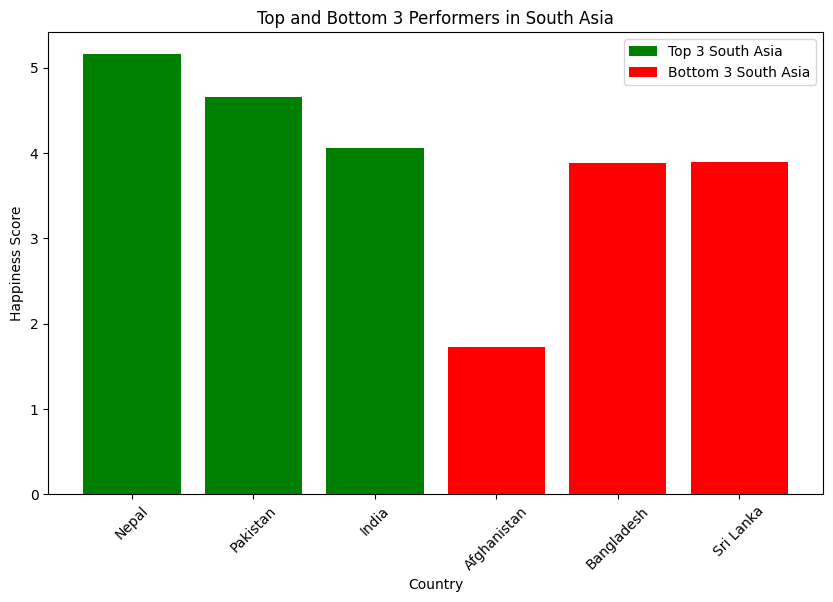

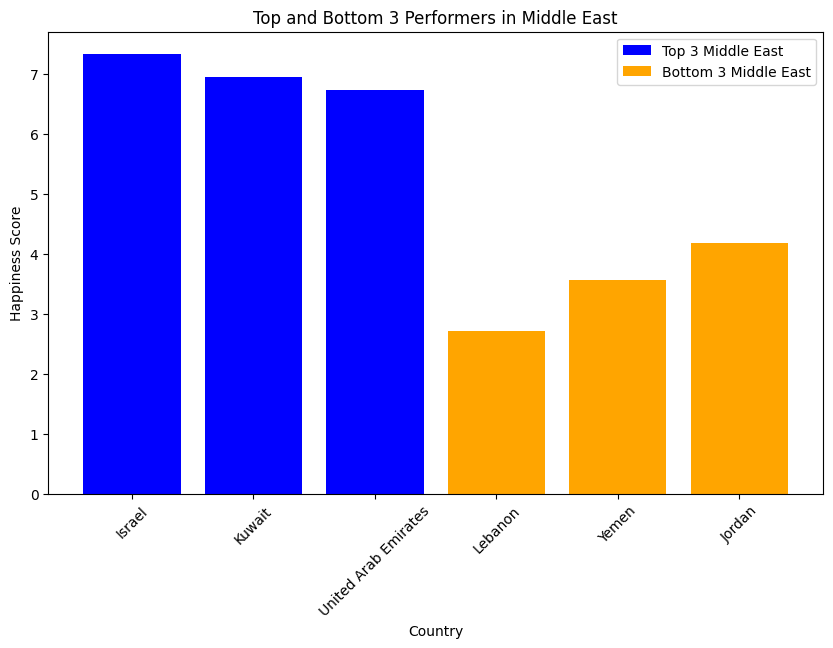

In [79]:
#2 Top and Bottom Performers
southasia_top_3 = southasia_df.nlargest(3, 'score')[['Country name', 'score']]
southasia_bottom_3 = southasia_df.nsmallest(3, 'score')[['Country name', 'score']]

# Top 3 and Bottom 3 performers for Middle East
middle_east_top_3 = middle_east_df.nlargest(3, 'score')[['Country name', 'score']]
middle_east_bottom_3 = middle_east_df.nsmallest(3, 'score')[['Country name', 'score']]

# Plot bar chart for South Asia
plt.figure(figsize=(10, 6))
plt.bar(southasia_top_3['Country name'], southasia_top_3['score'], color='green', label='Top 3 South Asia')
plt.bar(southasia_bottom_3['Country name'], southasia_bottom_3['score'], color='red', label='Bottom 3 South Asia')
plt.title('Top and Bottom 3 Performers in South Asia')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot bar chart for Middle East
plt.figure(figsize=(10, 6))
plt.bar(middle_east_top_3['Country name'], middle_east_top_3['score'], color='blue', label='Top 3 Middle East')
plt.bar(middle_east_bottom_3['Country name'], middle_east_bottom_3['score'], color='orange', label='Bottom 3 Middle East')
plt.title('Top and Bottom 3 Performers in Middle East')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [82]:
#4 Happiness Disparity-
southasia_range = southasia_df['score'].max() - southasia_df['score'].min()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

southasia_cv = southasia_df['score'].std() / southasia_df['score'].mean()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia - Score Range: {southasia_range:.2f}, CV: {southasia_cv:.2f}")
print(f"Middle East - Score Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}")

if southasia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
else:
    print("Middle East has greater variability in happiness scores.")


South Asia - Score Range: 3.44, CV: 0.30
Middle East - Score Range: 4.63, CV: 0.29
South Asia has greater variability in happiness scores.


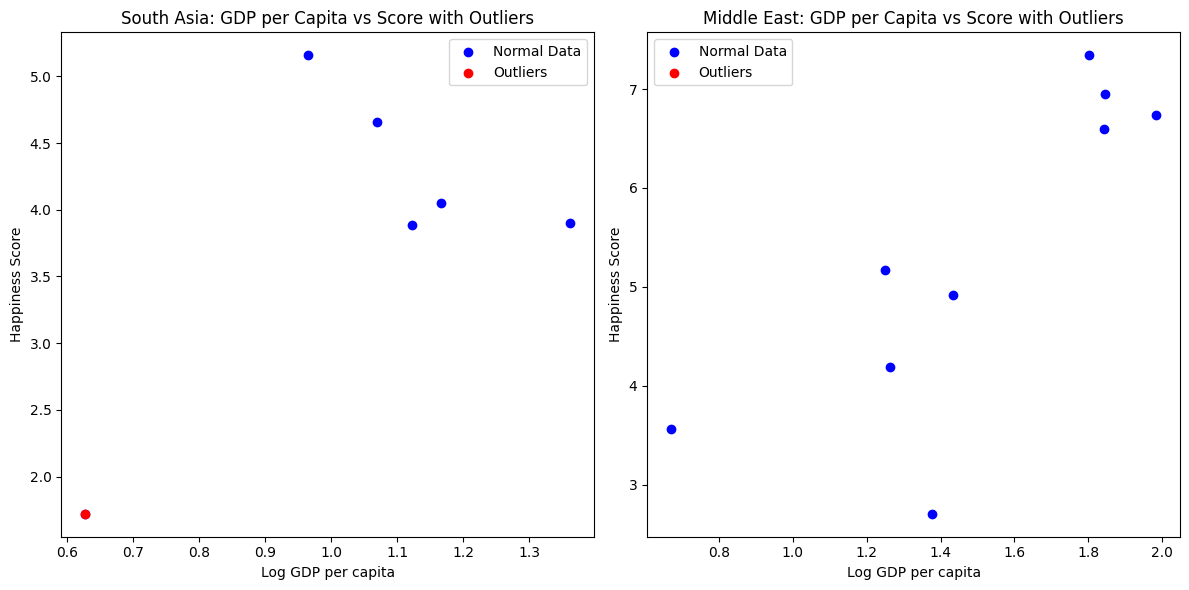

South Asia Outliers based on Score and GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Middle East Outliers based on Score and GDP per Capita:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


In [86]:
#6-
# Function to detect outliers using IQR
def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers, lower_bound, upper_bound

southasia_score_outliers, southasia_score_lower, southasia_score_upper = detect_outliers(southasia_df, 'score')
southasia_gdp_outliers, southasia_gdp_lower, southasia_gdp_upper = detect_outliers(southasia_df, 'Log GDP per capita')

middle_east_score_outliers, middle_east_score_lower, middle_east_score_upper = detect_outliers(middle_east_df, 'score')
middle_east_gdp_outliers, middle_east_gdp_lower, middle_east_gdp_upper = detect_outliers(middle_east_df, 'Log GDP per capita')

# Combine the outliers in each region
southasia_outliers = pd.concat([southasia_score_outliers, southasia_gdp_outliers]).drop_duplicates()
middle_east_outliers = pd.concat([middle_east_score_outliers, middle_east_gdp_outliers]).drop_duplicates()

# Plotting the scatter plot with outliers highlighted
plt.figure(figsize=(12, 6))

# South Asia scatter plot with outliers
plt.subplot(1, 2, 1)
plt.scatter(southasia_df['Log GDP per capita'], southasia_df['score'], color='blue', label='Normal Data')
plt.scatter(southasia_outliers['Log GDP per capita'], southasia_outliers['score'], color='red', label='Outliers')
plt.title('South Asia: GDP per Capita vs Score with Outliers')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend()

# Middle East scatter plot with outliers
plt.subplot(1, 2, 2)
plt.scatter(middle_east_df['Log GDP per capita'], middle_east_df['score'], color='blue', label='Normal Data')
plt.scatter(middle_east_outliers['Log GDP per capita'], middle_east_outliers['score'], color='red', label='Outliers')
plt.title('Middle East: GDP per Capita vs Score with Outliers')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend()

plt.tight_layout()
plt.show()

# Print the outliers for discussion
print("South Asia Outliers based on Score and GDP per Capita:")
print(southasia_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East Outliers based on Score and GDP per Capita:")
print(middle_east_outliers[['Country name', 'score', 'Log GDP per capita']])


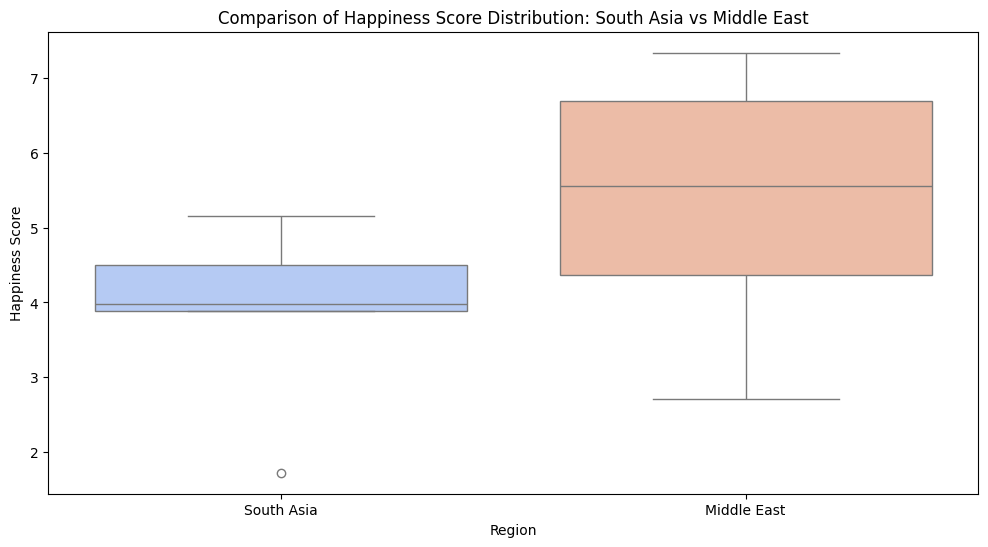

In [90]:
#7-
southasia_df.loc[:, 'Region'] = 'South Asia'
middle_east_df.loc[:, 'Region'] = 'Middle East'

combined_df = pd.concat([southasia_df[['Country name', 'score', 'Region']],
                         middle_east_df[['Country name', 'score', 'Region']]])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='score', data=combined_df, palette='coolwarm', hue='Region')

plt.title('Comparison of Happiness Score Distribution: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')

plt.show()
